In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [2]:
df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')

In [3]:
df.shape

(60000, 785)

In [4]:
df.sample(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
51874,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31273,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49317,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53372,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:
X.sample()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
28669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
y.iloc[28669]

4

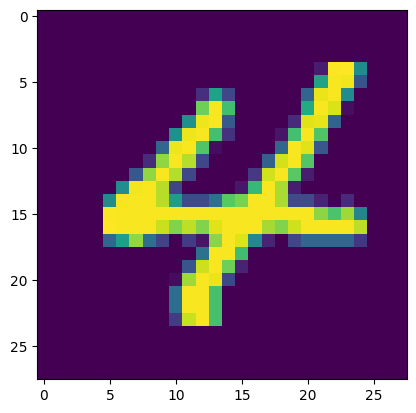

In [13]:
plt.imshow(X.iloc[28669].values.reshape((28,28)))

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [17]:
X_train.shape

(48000, 784)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier()

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(X_test)

In [23]:
print(accuracy_score(y_test, y_pred))

0.9699166666666666


In [24]:
from sklearn.decomposition import PCA

In [40]:
transformer = PCA(n_components=50)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
ss = StandardScaler()

In [29]:
X_train_trf = ss.fit_transform(X_train)
X_test_trf = ss.transform(X_test)

In [41]:
X_train_pca = transformer.fit_transform(X_train_trf)
X_test_pca = transformer.transform(X_test_trf)

In [42]:
knn = KNeighborsClassifier()

In [43]:
knn.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [44]:
y_pred_new = knn.predict(X_test_pca)

In [45]:
print(accuracy_score(y_test, y_pred_new))

0.9575


In [38]:
X_train.shape[1]

784

In [39]:
for i in range(1, 785):
    pca = PCA(n_components=i)

    X_train_pca = transformer.fit_transform(X_train_trf)
    X_test_pca = transformer.transform(X_test_trf)

    knn = KNeighborsClassifier()
    
    knn.fit(X_train_pca, y_train)
    y_pred_new = knn.predict(X_test_pca)

    print(accuracy_score(y_test, y_pred_new))

0.943


KeyboardInterrupt: 